### Top 200 features or bag of words from the text documents

In [1]:
import re
import os
import collections
import json
import nltk
stopwords = nltk.corpus.stopwords.words('english')
files=os.listdir('Assignment_samples/')

In [2]:
#pre processing the text 

def normalize_text(text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    re.sub(' +', ' ', text)
    text=text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    #normalize some utf8 encoding
    text = text.replace("\x9d",'').replace("\x8c",'')
    text = text.replace("\xa0",'')
    text = text.replace("\x9d\x92", '').replace("\x9a\xaa\xf0\x9f\x94\xb5", '').replace("\xf0\x9f\x91\x8d\x87\xba\xf0\x9f\x87\xb8", '').replace("\x9f",'').replace("\x91\x8d",'')
    text = text.replace("\xf0\x9f\x87\xba\xf0\x9f\x87\xb8",'').replace("\xf0",'').replace('\xf0x9f','').replace("\x9f\x91\x8d",'').replace("\x87\xba\x87\xb8",'')
    text = text.replace("\xe2\x80\x94",'').replace("\x9d\xa4",'').replace("\x96\x91",'').replace("\xe1\x91\xac\xc9\x8c\xce\x90\xc8\xbb\xef\xbb\x89\xd4\xbc\xef\xbb\x89\xc5\xa0\xc5\xa0\xc2\xb8",'')
    text = text.replace("\xe2\x80\x99s", "").replace("\xe2\x80\x98", '').replace("\xe2\x80\x99", '').replace("\xe2\x80\x9c", "").replace("\xe2\x80\x9d", "")
    text = text.replace("\xe2\x82\xac", "").replace("\xc2\xa3", "").replace("\xc2\xa0", "").replace("\xc2\xab", "").replace("\xf0\x9f\x94\xb4", "").replace("\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\xf0\x9f", "")
    text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    
    return text

In [3]:
#Reading documents, storing in a list

documents=[]
for file in files:
    document = (''.join(open('Assignment_samples/'+ file).read()))
    documents.append(normalize_text(document))

In [4]:
#get tokens and get counts for each token

words=" ".join(documents).split() 
count= collections.Counter(words).most_common()
print(count[:20])

[('the', 39826), ('of', 27423), ('and', 25256), ('to', 21562), ('in', 19656), ('or', 16870), ('is', 11479), ('by', 9868), ('this', 9767), ('for', 9524), ('ubs', 8239), ('as', 7124), ('on', 6649), ('any', 6281), ('securities', 6107), ('not', 5974), ('that', 5806), ('be', 5563), ('are', 5476), ('research', 5093)]


In [5]:
#Remove the stop words (words which don't give much meaning)

new_count = []
for key in count:
    if key[0] not in stopwords:
        new_count.append(key)
print(new_count[:20])

[('ubs', 8239), ('securities', 6107), ('research', 5093), ('may', 5012), ('report', 4719), ('financial', 3988), ('investment', 3966), ('price', 3829), ('us', 3566), ('limited', 3337), ('credit', 3324), ('company', 3046), ('information', 2935), ('services', 2868), ('suisse', 2659), ('market', 2627), ('april', 2575), ('growth', 2411), ('jefferies', 2358), ('document', 2343)]


In [6]:
#printing top 200 features

top200features=[]
top200featurescount=[]
i=0
for pair in new_count:
    if i==200:
        break
    top200features.append(pair[0])
    top200featurescount.append(pair[1])
    i+=1

with open('feature_list.txt','w') as f:
    f.write(str(top200features))

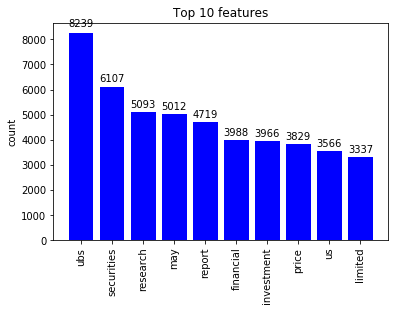

In [7]:
#plotting top10 features 
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

#plotting
import numpy as np
import matplotlib.pyplot as plt

labels=np.array(top200features[:10])
ind=np.arange(len(labels))
values=np.array(top200featurescount[:10])

fig,ax = plt.subplots()
rects = ax.bar(ind,values,color='b')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_title("Top 10 features")
ax.set_ylabel('count')
autolabel(rects)
plt.show()

In [8]:
# create a dictionary for all documents--> dict={key=index,value=pair of word and count} ex:{1:['word',20]}

unique_words=[[i[0],i[1]] for i in new_count]
unique_words=sorted(unique_words)
dic = {i: word for i,word in enumerate(unique_words,1)}
with open('dict.txt','w') as f:
    f.write(json.dumps(dic))

### Using Scikit learn to do the same in just a few lines of code

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

bow = vectorizer.fit_transform(documents)
freqs = [(word, bow.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
results=sorted (freqs, key = lambda x: -x[1])
print(results[:20])

[('ubs', 8239), ('securities', 6107), ('research', 5093), ('report', 4719), ('financial', 3988), ('investment', 3966), ('price', 3829), ('limited', 3337), ('credit', 3324), ('company', 3046), ('information', 2935), ('services', 2868), ('suisse', 2659), ('market', 2627), ('april', 2576), ('growth', 2411), ('jefferies', 2358), ('document', 2343), ('analyst', 2251), ('source', 2160)]


In [10]:
# for bi-grams
vectorizer2 = CountVectorizer(ngram_range=(2, 2),stop_words='english')

bow2 = vectorizer2.fit_transform(documents)
freqs2 = [(word, bow2.getcol(idx).sum()) for word, idx in vectorizer2.vocabulary_.items()]
results2=sorted (freqs2, key = lambda x: -x[1])
print(results2[:20])

[('credit suisse', 2659), ('ubs securities', 1869), ('ubs limited', 1250), ('capital markets', 1195), ('ubs ag', 1178), ('rbc capital', 1139), ('financial services', 912), ('target price', 874), ('hong kong', 857), ('distributed ubs', 843), ('investment banking', 803), ('total return', 677), ('financial instruments', 637), ('securities llc', 614), ('nm nm', 606), ('research report', 597), ('price target', 587), ('na na', 568), ('research analyst', 565), ('research reports', 557)]


In [12]:
#if we wanna apply some weights we can use tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
bow1 = vectorizer1.fit_transform(documents)

freqs1 = [(word, bow1.getcol(idx).sum()) for word, idx in vectorizer1.vocabulary_.items()]
results1=sorted (freqs1, key = lambda x: -x[1])
print(results1[:20])

[('ubs', 9.4299793832752528), ('rmb', 5.3621672534344915), ('jefferies', 4.8195064672662706), ('municipal', 4.0537529899400422), ('france', 3.9738796643488672), ('saudi', 3.8798423794017158), ('neo', 3.8705177541318498), ('pte', 3.8705177541318498), ('cv', 3.6516403841196547), ('financiero', 3.6430316361577724), ('grupo', 3.632837864005376), ('rbc', 3.6188649137052695), ('arabia', 3.4164081046746997), ('spolka', 3.4039036653119337), ('ograniczona', 3.4039036653119337), ('odpowiedzialnoscia', 3.4039036653119337), ('oddzial', 3.4039036653119337), ('polsce', 3.4039036653119337), ('sebi', 3.4039036653119337), ('nse', 3.4039036653119337)]
